In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Cleaning Data

In [26]:
temp1_data = pd.read_csv('adult_Income_regression.csv')

temp2_data = temp1_data.drop(temp1_data.columns[[1,2,3,5,6,7,8,10,11]], axis=1)

temp2_data.head(5)

,Age,Education-num,Sex,Hours-per-week,Native-country,Income
0,39,13,Male,40,United-States,<=50K
1,50,13,Male,13,United-States,<=50K
2,38,9,Male,40,United-States,<=50K
3,53,7,Male,40,United-States,<=50K
4,28,13,Female,40,Cuba,<=50K


In [27]:
temp2_data.describe()

,Age,Education-num,Hours-per-week
count,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,40.437456
std,13.640433,2.572720,12.347429
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,48.000000,12.000000,45.000000
max,90.000000,16.000000,99.000000


In [28]:
temp2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 6 columns):
Age               32561 non-null int64
Education-num     32561 non-null int64
Sex               32561 non-null object
Hours-per-week    32561 non-null int64
Native-country    32561 non-null object
Income            32561 non-null object
dtypes: int64(3), object(3)
memory usage: 1.5+ MB


In [29]:
#as the number of non-null values in .info() command equal to the
#count values in .describe() command, there is no missing data
temp2_data.dropna(axis = 0, how ='any', inplace=True)

In [30]:
### Create Dummy Columns

In [31]:
Sex = pd.get_dummies(temp2_data.Sex, drop_first=True)
Income = pd.get_dummies(temp2_data['Income'],drop_first=True)
data = pd.concat([temp2_data.drop(["Sex", "Income"], axis=1), Sex, Income], axis=1)
data.rename(columns={' Male':'Male',' >50K':'50K'}, inplace=True)
data.head(5)

,Age,Education-num,Hours-per-week,Native-country,Male,50K
0,39,13,40,United-States,1,0
1,50,13,13,United-States,1,0
2,38,9,40,United-States,1,0
3,53,7,40,United-States,1,0
4,28,13,40,Cuba,0,0


### Deleting the white spaces in "Native-country" column

In [ ]:
NorthAmerica_list = ["Canada", "Cuba", "Dominican-Republic", "El-Salvador", "Guatemala","Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua","Outlying-US(Guam-USVI-etc)", "Puerto-Rico", "Trinadad&Tobago", "United-States", "North America"]
Asia_list = ["Cambodia", "China", "Hong", "India", "Iran", "Japan", "Laos", "Philippines", "Taiwan", "Thailand", "Vietnam", "Asia"]
SouthAmerica_list = ["Columbia", "Ecuador", "Peru", "South America"]
Europ_list = ["England", "France", "Germany", "Greece", "Holand-Netherlands", "Hungary", "Ireland", "Italy", "Poland", "Portugal", "Scotland","Yugoslavia", "Europ"]



for i in range(data.shape[0]):
    country = data['Native-country'][i].strip()
    
    if country in NorthAmerica_list:
        data['Native-country'][i] = "North America"
    elif country in Asia_list:
        data['Native-country'][i] = "Asia"
    elif country in SouthAmerica_list:
        data['Native-country'][i] = "South America"
    elif country in Europ_list:
        data['Native-country'][i] = "Europ"
    else:
        data['Native-country'][i] = "Other"
    print(i, data['Native-country'][i])

In [34]:
data.head()

,Age,Education-num,Hours-per-week,Native-country,Male,50K
0,39,13,40,North America,1,0
1,50,13,13,North America,1,0
2,38,9,40,North America,1,0
3,53,7,40,North America,1,0
4,28,13,40,North America,0,0


In [35]:
country = pd.get_dummies(data["Native-country"], drop_first=True)
data = pd.concat([data.drop(["Native-country"], axis=1), country], axis=1)
data.head()

,Age,Education-num,Hours-per-week,Male,50K,Europ,North America,Other,South America
0,39,13,40,1,0,0,1,0,0
1,50,13,13,1,0,0,1,0,0
2,38,9,40,1,0,0,1,0,0
3,53,7,40,1,0,0,1,0,0
4,28,13,40,0,0,0,1,0,0


## Converting the country names into 5 categories

In [36]:
data.columns

Index(['Age', 'Education-num', 'Hours-per-week', 'Male', '50K', 'Europ',
       'North America', 'Other', 'South America'],
      dtype='object')

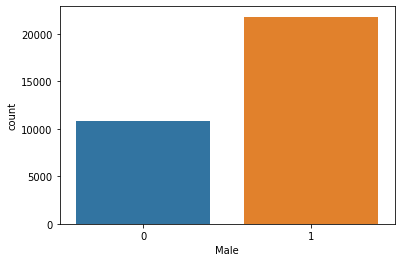

In [38]:
sns.countplot(data["Male"]);

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


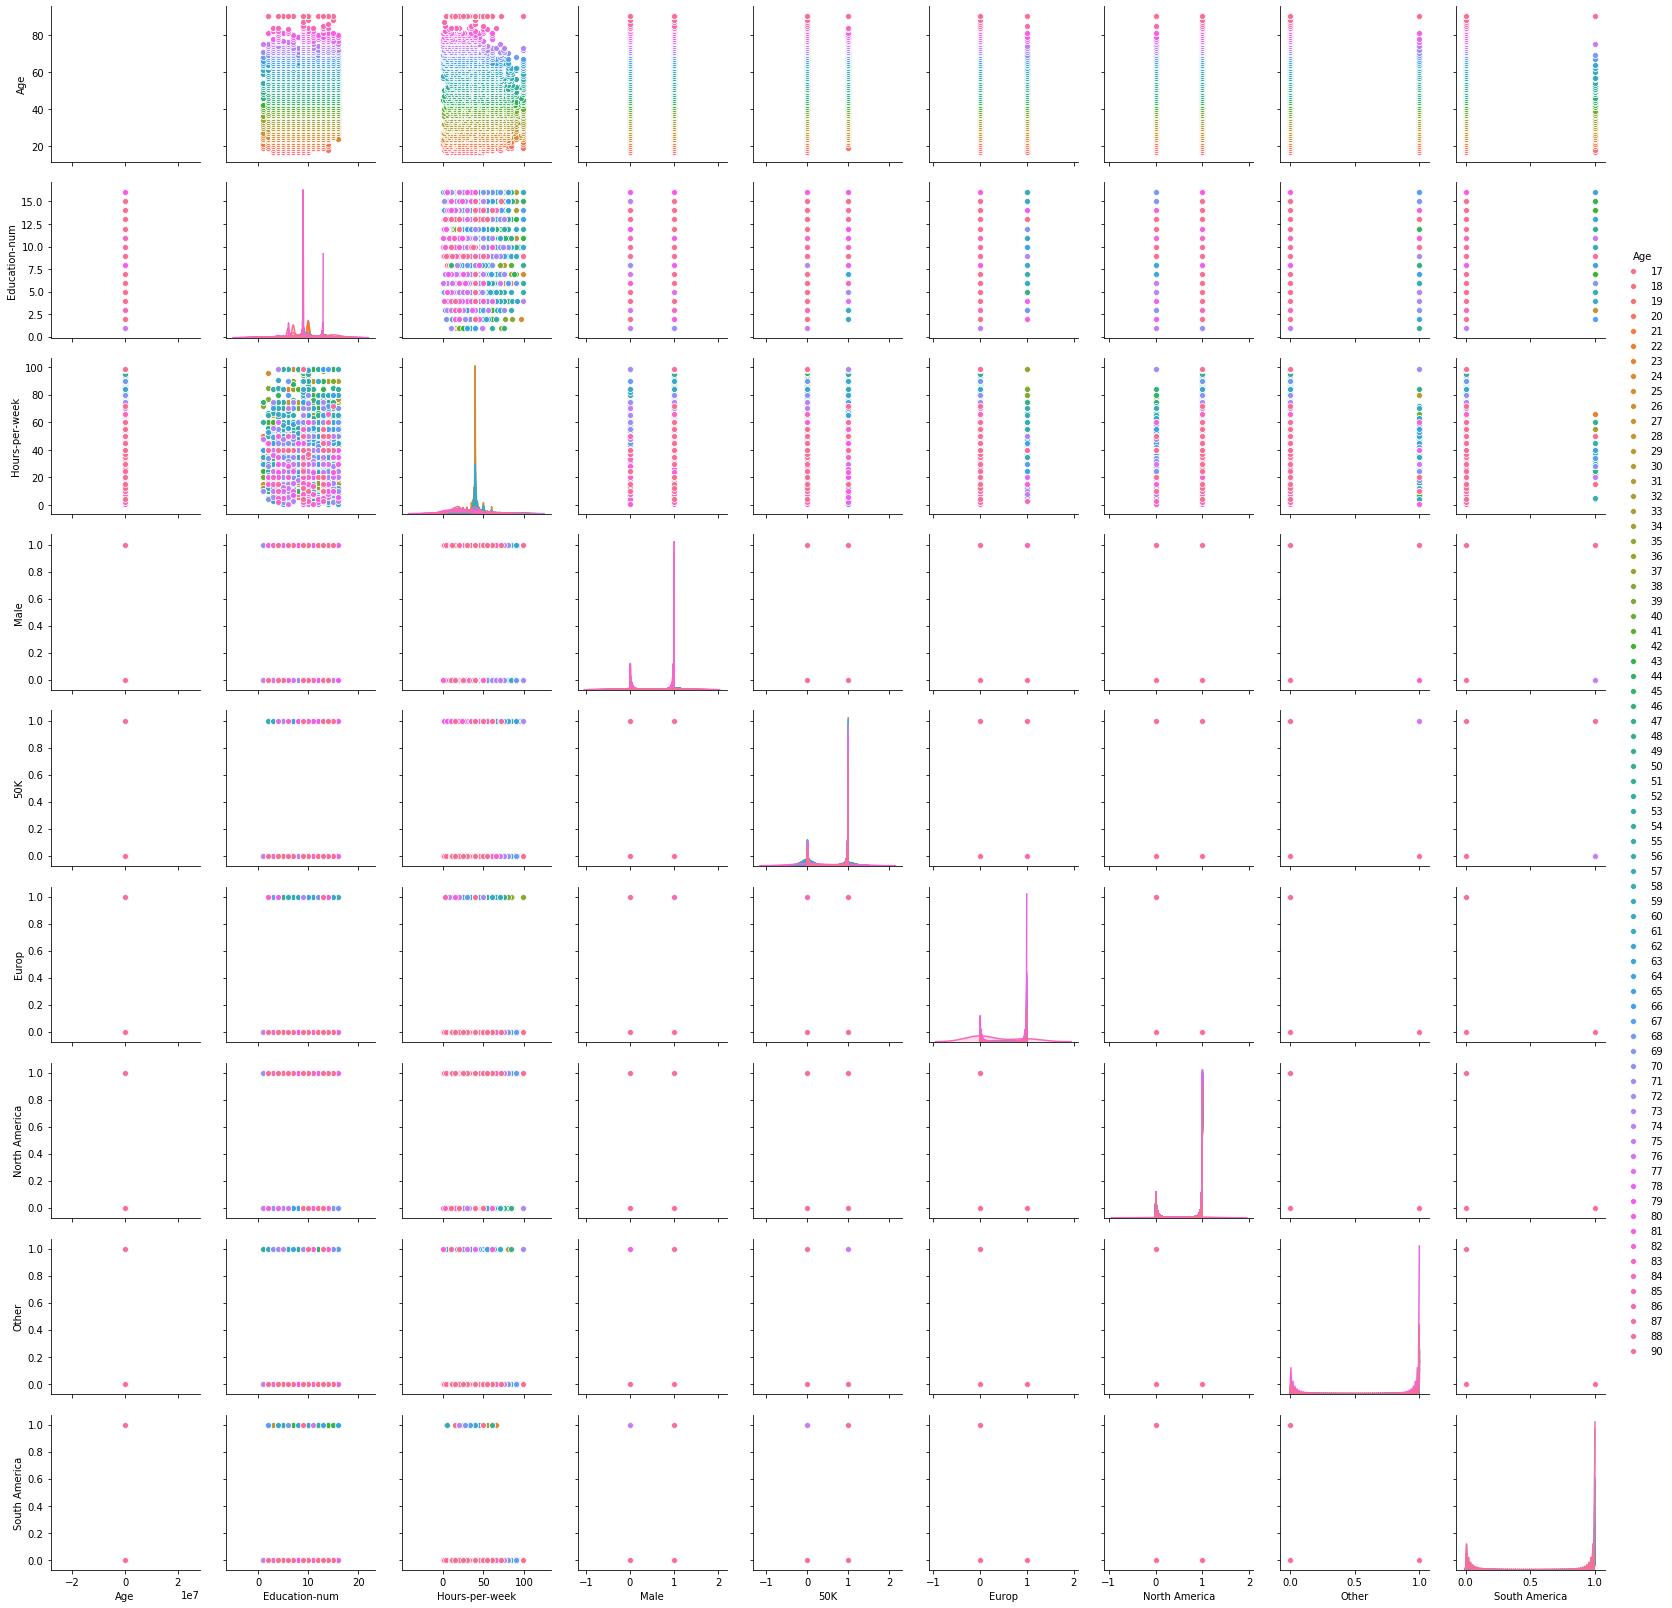

In [47]:
sns.pairplot(data, hue="Age")

In [40]:
X = data.drop(["50K"], axis=1)
Y = data["50K"]

In [41]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: 50K, dtype: uint8

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [43]:
from sklearn.linear_model import LogisticRegression
L_R=LogisticRegression()
L_R.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
Prediction=L_R.predict(X_test)

In [45]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Prediction))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88      7550
           1       0.64      0.38      0.48      2219

    accuracy                           0.81      9769
   macro avg       0.74      0.66      0.68      9769
weighted avg       0.79      0.81      0.79      9769



In [46]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Prediction))

[[7067  483]
 [1372  847]]
